[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1GrY2Bgqi5tsPgAoxJ2eF8Z_JRpUADN89#scrollTo=kAkdN0jZpgDF)

# First load adapter and base model to merge them togther then save it to convert it to bf16 and quatize to 4 and 5 bit gguf

In [ ]:
!pip install -q transformers peft

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 6.9 MB/s eta 0:00:00


In [ ]:
import os
import shutil
import torch
import warnings

from transformers import AutoModelForCausalLM, AutoTokenizer
from peft import PeftModel

In [ ]:
warnings.filterwarnings( "ignore" )

baseModel = "meta-llama/Llama-2-7b-chat-hf"
peft      = "Elkhayyat17/qlora-code-llama2"
outdir    = "/content/merged"

In [ ]:
from huggingface_hub import login
login()

In [ ]:
print( f"Loading base model: {baseModel}")
model = AutoModelForCausalLM.from_pretrained(
    baseModel,
    torch_dtype = torch.float16,
    device_map = "cuda"
)

Loading base model: meta-llama/Llama-2-7b-chat-hf


config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

In [ ]:
print( f"Loading PEFT: {peft}" )
model = PeftModel.from_pretrained( model, peft )
print( "Running merge_and_unload" )
model = model.merge_and_unload()

Loading PEFT: Elkhayyat17/qlora-code-llama2


adapter_config.json:   0%|          | 0.00/620 [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/16.8M [00:00<?, ?B/s]

Running merge_and_unload


In [ ]:

tokenizer = AutoTokenizer.from_pretrained( baseModel )

if os.path.isdir( outdir ):
    shutil.rmtree( outdir )

model.save_pretrained( outdir )
tokenizer.save_pretrained( outdir )
print( f"Model saved to {outdir}" )

tokenizer_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

Model saved to /content/merged


##next cell if you want to push merged model to HF

In [ ]:
#create repo for merged model
model.push_to_hub(repo_id="merged-code-llama2")

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/3.59G [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Elkhayyat17/merged-code-llama2/commit/f9190c589a7aaf05db9be15440365da8cd3d3f95', commit_message='Upload LlamaForCausalLM', commit_description='', oid='f9190c589a7aaf05db9be15440365da8cd3d3f95', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


# install necessary libirary to quatization

In [ ]:
!git clone https://github.com/ggerganov/llama.cpp
!cd llama.cpp && git pull && make clean && LLAMA_CUBLAS=1 make


Cloning into 'llama.cpp'...
remote: Enumerating objects: 19725, done.
remote: Counting objects: 100% (7040/7040), done.
remote: Compressing objects: 100% (597/597), done.
remote: Total 19725 (delta 6772), reused 6553 (delta 6440), pack-reused 12685
Receiving objects: 100% (19725/19725), 23.58 MiB | 19.08 MiB/s, done.
Resolving deltas: 100% (13942/13942), done.
Already up to date.
I ccache not found. Consider installing it for faster compilation.
I llama.cpp build info: 
I UNAME_S:   Linux
I UNAME_P:   x86_64
I UNAME_M:   x86_64
I CFLAGS:    -I. -Icommon -D_XOPEN_SOURCE=600 -D_GNU_SOURCE -DNDEBUG  -std=c11   -fPIC -O3 -Wall -Wextra -Wpedantic -Wcast-qual -Wno-unused-function -Wshadow -Wstrict-prototypes -Wpointer-arith -Wmissing-prototypes -Werror=implicit-int -Werror=implicit-function-declaration -pthread -march=native -mtune=native -Wdouble-promotion 
I CXXFLAGS:  -std=c++11 -fPIC -O3 -Wall -Wextra -Wpedantic -Wcast-qual -Wno-unused-function -Wmissing-declarations -Wmissing-noreturn -

In [ ]:
!pip install  -U 'numpy~=1.24.4 ' 'sentencepiece~=0.1.98' 'transformers>=4.35.2,<5.0.0' 'gguf>=0.1.0' 'protobuf>=4.21.0,<5.0.0'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 94.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 38.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.38.1
    Uninstalling transformers-4.38.1:
      Successfully uninstalled transformers-4.38.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.25.3 

Be sure current directory is llama.cpp

In [ ]:
#%cd llama.cpp

In [ ]:
!python3 llama.cpp/convert.py  /content/merged


Loading model file /content/merged/model-00001-of-00003.safetensors
Loading model file /content/merged/model-00001-of-00003.safetensors
Loading model file /content/merged/model-00002-of-00003.safetensors
Loading model file /content/merged/model-00003-of-00003.safetensors
params = Params(n_vocab=32000, n_embd=4096, n_layer=32, n_ctx=4096, n_ff=11008, n_head=32, n_head_kv=32, n_experts=None, n_experts_used=None, f_norm_eps=1e-05, rope_scaling_type=None, f_rope_freq_base=10000.0, f_rope_scale=None, n_orig_ctx=None, rope_finetuned=None, ftype=None, path_model=PosixPath('/content/merged'))
Found vocab files: {'spm': PosixPath('/content/merged/tokenizer.model'), 'bpe': None, 'hfft': PosixPath('/content/merged/tokenizer.json')}
Loading vocab file PosixPath('/content/merged/tokenizer.model'), type 'spm'
Vocab info: <SentencePieceVocab with 32000 base tokens and 0 added tokens>
Special vocab info: <SpecialVocab with 0 merges, special tokens {'bos': 1, 'eos': 2, 'unk': 0}, add special tokens {'b

In [ ]:
!./llama.cpp/quantize /content/merged/ggml-model-f16.gguf code-llama2-Q4_K_M.gguf Q4_K_M


ggml_init_cublas: GGML_CUDA_FORCE_MMQ:   no
ggml_init_cublas: CUDA_USE_TENSOR_CORES: yes
ggml_init_cublas: found 1 CUDA devices:
  Device 0: Tesla T4, compute capability 7.5, VMM: yes
main: build = 2341 (29ae62d2)
main: built with cc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0 for x86_64-linux-gnu
main: quantizing '/content/merged/ggml-model-f16.gguf' to 'code-llama2-Q4_K_M.gguf' as Q4_K_M
llama_model_loader: loaded meta data with 22 key-value pairs and 291 tensors from /content/merged/ggml-model-f16.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = LLaMA v2
llama_model_loader: - kv   2:                       llama.context_length u32              = 4096
llama_model_loader: - kv   3:                     llama.embedding_length u

# Upload quatizatoin file to HF

copy gguf file path

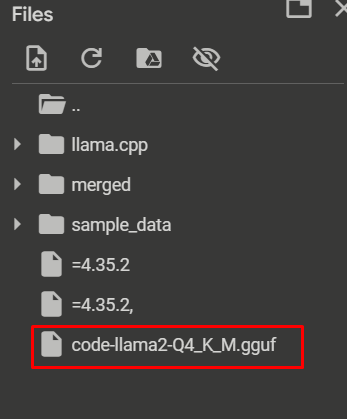

In [ ]:

from huggingface_hub import login
login()

In [ ]:
#Create repo first manullay or coding
#here i created it manullay then past id
from huggingface_hub import HfApi
api = HfApi()
api.upload_file(
    path_or_fileobj="/content/code-llama2-Q4_K_M.gguf", ## fil  path
    path_in_repo="code-llama2-Q4_K_M.gguf", ## file name
    repo_id="Elkhayyat17/code-llama2-gguf",## repi id
    repo_type="model",
)

code-llama2-Q4_K_M.gguf:   0%|          | 0.00/4.08G [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Elkhayyat17/code-llama2-gguf/commit/a21cc99537bd855dbb76e76795058cb4d73d847f', commit_message='Upload code-llama2-Q4_K_M.gguf with huggingface_hub', commit_description='', oid='a21cc99537bd855dbb76e76795058cb4d73d847f', pr_url=None, pr_revision=None, pr_num=None)